## Wczytanie pakietów

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## Zaczytanie danych

In [52]:
df = pd.read_csv("D:/Studia/Semestr 4/WB/project/data/learning_data.csv")

In [53]:
df.head()

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Columns: 785 entries, ptnum to C-999999
dtypes: float64(59), int64(2), object(724)
memory usage: 54.2+ MB


In [55]:
df.describe()

,label,scc,C-75443-2,C-84215-3,C-26453-1,C-26464-8,C-26515-7,C-30385-9,C-30428-7,C-33037-3,...,C-713-8,C-727711,C-731-0,C-736-9,C-742-7,C-751-8,C-770-8,C-82078001,C-86849004,C-86964003
count,9048.000000,9048.000000,16.0,16.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,256.000000,0.0,256.000000,256.00000,256.000000,256.000000,256.000000,0.0,0.0,0.0
mean,0.252874,103.895999,1.0,1.0,5.125166,13.175497,308.200662,13.006623,87.692715,8.339073,...,4.513672,NaN,0.945664,15.17957,0.948047,2.679688,27.573555,NaN,NaN,NaN
std,0.434683,21.988655,0.0,0.0,0.379863,1.223817,88.495507,0.899605,4.636940,3.508351,...,0.255184,NaN,0.154276,1.67533,0.075522,0.225392,3.014690,NaN,NaN,NaN
min,0.000000,9.000000,1.0,1.0,4.500000,11.100000,155.300000,11.600000,80.000000,2.000000,...,3.740000,NaN,0.500000,10.32000,0.750000,2.080000,18.610000,NaN,NaN,NaN
25%,0.000000,100.000000,1.0,1.0,4.800000,12.000000,232.950000,12.150000,83.600000,5.500000,...,4.370000,NaN,0.980000,14.08250,0.900000,2.540000,25.457500,NaN,NaN,NaN
50%,0.000000,107.000000,1.0,1.0,5.100000,13.400000,304.100000,13.100000,88.100000,8.200000,...,4.500000,NaN,1.000000,15.19000,0.950000,2.690000,27.840000,NaN,NaN,NaN
75%,1.000000,116.000000,1.0,1.0,5.400000,14.300000,386.550000,13.800000,91.400000,11.350000,...,4.680000,NaN,1.020000,16.38500,1.000000,2.830000,29.502500,NaN,NaN,NaN
max,1.000000,190.000000,1.0,1.0,5.900000,15.000000,449.900000,14.600000,96.000000,14.900000,...,5.240000,NaN,1.090000,20.15000,1.160000,3.260000,34.850000,NaN,NaN,NaN


In [56]:
df.shape

(9048, 785)

## EDA

### Duplikaty

In [57]:
df.duplicated().sum()

0

### Nulle

In [58]:
df.isnull().sum()

ptnum             0
label             0
scc               0
C-103579009       0
C-125680007       0
               ... 
C-979092       9046
C-993452       9041
C-997501       9041
C-999998       9046
C-999999       9040
Length: 785, dtype: int64

In [59]:
null_percentages = df.isnull().mean()
columns_with_nulls_over_50_percent = null_percentages[null_percentages > 0.5]
print(columns_with_nulls_over_50_percent)
#usuwamy kolumny które mają więcej niż połowe obserwacji Null

C-762993000    0.625221
C-424393004    0.512710
C-2857-1       0.750663
C-410006001    0.750663
C-10834-0      0.610522
                 ...   
C-979092       0.999779
C-993452       0.999226
C-997501       0.999226
C-999998       0.999779
C-999999       0.999116
Length: 717, dtype: float64


In [60]:
df = df.drop(columns_with_nulls_over_50_percent.index, axis = 1)
df.info()
# zostało 66 object i 2 int, z czego jedna to label = zmienna docelowa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ptnum              9048 non-null   object
 1   label              9048 non-null   int64 
 2   scc                9048 non-null   int64 
 3   C-103579009        9048 non-null   object
 4   C-125680007        9048 non-null   object
 5   C-186034007        9048 non-null   object
 6   C-263495000        9048 non-null   object
 7   C-398070004        9048 non-null   object
 8   C-424144002        9048 non-null   object
 9   C-72514-3          9044 non-null   object
 10  C-140              9043 non-null   object
 11  C-18262-6          9043 non-null   object
 12  C-2085-9           9043 non-null   object
 13  C-2093-3           9043 non-null   object
 14  C-2571-8           9043 non-null   object
 15  C-39156-5          9043 non-null   object
 16  C-710824005        9043 non-null   object


In [61]:
df['ptnum'].nunique()
# kazdy wiersz to oddzielny pacjent

9048

### Unikalne wartosci w kategorycznych

In [62]:
df.head()

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-113,C-706893006,C-1742-6,C-1751-7,C-1920-8,C-6768-6,C-1975-2,C-8310-5,C-315639002,C-370789001
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,True,True,NaN,NaN,NaN,NaN,NaN,normal,True,True
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,abnormal,normal,normal,normal,normal,NaN,True,True
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,True,NaN,abnormal,normal,normal,abnormal,normal,NaN,True,True
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,True,abnormal,normal,normal,abnormal,normal,NaN,True,True
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
columns_to_drop = []
for column in cat_col:
    unique_values = df[column].replace("no data", pd.NA).dropna().unique()
    if len(unique_values) <= 1:
        columns_to_drop.append(column)
df.drop(columns=columns_to_drop, inplace=True)
# usuwamy wszystkie kolumny, które po wyrzuceniu nulli mają tylko jedną obserwacje = bezużyteczność w modelu

In [64]:
df.fillna("no data", inplace=True)
df.isna().sum()
# braki uzupełniamy no data

ptnum          0
label          0
scc            0
C-103579009    0
C-125680007    0
C-186034007    0
C-263495000    0
C-424144002    0
C-72514-3      0
C-18262-6      0
C-2085-9       0
C-2093-3       0
C-2571-8       0
C-39156-5      0
C-72166-2      0
C-8462-4       0
C-8480-6       0
C-8867-4       0
C-9279-1       0
C-718-7        0
C-21000-5      0
C-6690-2       0
C-777-3        0
C-785-6        0
C-789-8        0
C-4544-3       0
C-20565-8      0
C-2069-3       0
C-2339-0       0
C-38483-4      0
C-4548-4       0
C-33914-3      0
C-1742-6       0
C-1751-7       0
C-1920-8       0
C-6768-6       0
C-1975-2       0
C-8310-5       0
dtype: int64

In [65]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
df[cat_col].nunique()
# kolumna ptnum jest pomijalna, gdyż to jest id pacjenta i wiemy, że kazdy wiersz = oddzielny pacjent

ptnum          9048
C-103579009       6
C-125680007       2
C-186034007       2
C-263495000       2
C-424144002       3
C-72514-3         3
C-18262-6         3
C-2085-9          3
C-2093-3          3
C-2571-8          3
C-39156-5         3
C-72166-2         3
C-8462-4          3
C-8480-6          3
C-8867-4          3
C-9279-1          3
C-718-7           3
C-21000-5         3
C-6690-2          3
C-777-3           3
C-785-6           3
C-789-8           3
C-4544-3          3
C-20565-8         3
C-2069-3          3
C-2339-0          3
C-38483-4         3
C-4548-4          3
C-33914-3         3
C-1742-6          3
C-1751-7          3
C-1920-8          3
C-6768-6          3
C-1975-2          3
C-8310-5          3
dtype: int64

In [66]:
for col in cat_col:
    print(df[col].value_counts())
    print(end= "\n________________________________________________________________\n")

p17767.2    1
p12767.2    1
p20807.1    1
p1592.2     1
p20207.1    1
           ..
p3084       1
p29385      1
p7381.1     1
p3278       1
p14906.2    1
Name: ptnum, Length: 9048, dtype: int64

________________________________________________________________
white       7366
black        744
asian        693
hawaiian     104
other         96
native        45
Name: C-103579009, dtype: int64

________________________________________________________________
m    7261
s    1787
Name: C-125680007, dtype: int64

________________________________________________________________
nonhispanic    8108
hispanic        940
Name: C-186034007, dtype: int64

________________________________________________________________
m    5121
f    3927
Name: C-263495000, dtype: int64

________________________________________________________________
50t70    6105
30t50    2149
gt70      794
Name: C-424144002, dtype: int64

________________________________________________________________
abnormal    5647
normal   

In [78]:
df = df.drop('ptnum', axis=1) # usuwamy ptnum

### Analiza na wykresach

<Axes: >

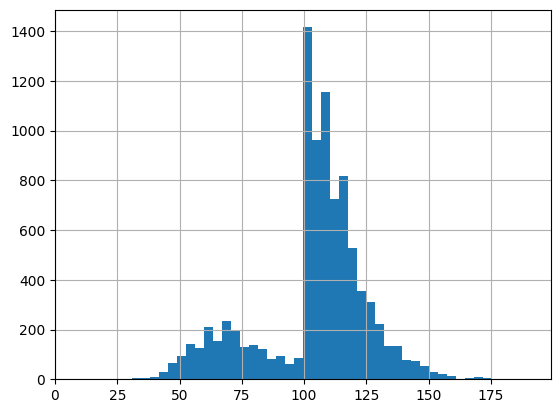

In [72]:
df['scc'].hist(bins = 50)

<Axes: xlabel='scc'>

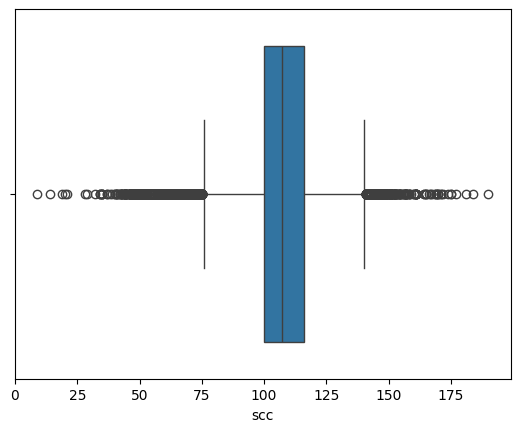

In [73]:
sns.boxplot(data=df, x=df['scc'])

### Outliers

In [74]:
print(f'Przed: { df.shape[0]}')
mean_pr = df['scc'].mean()
std_pr = df['scc'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df = df[(df['scc'] >= lower) & (df['scc'] <= upper)]
print(f'Po: { df.shape[0]}')

Przed: 9048
Po: 9018


<Axes: xlabel='scc'>

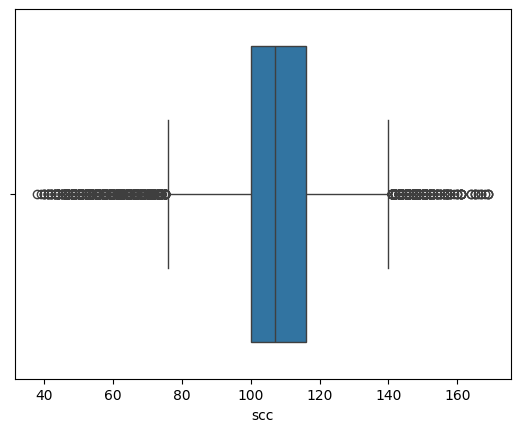

In [75]:
sns.boxplot(data=df, x=df['scc'])

In [85]:
# korelacja miedzy scc i labels
print(df['label'].corr(df['scc']))
# silnie skorelowane ujemnie

-0.7710625322637124


### Zmienne kategoryczne

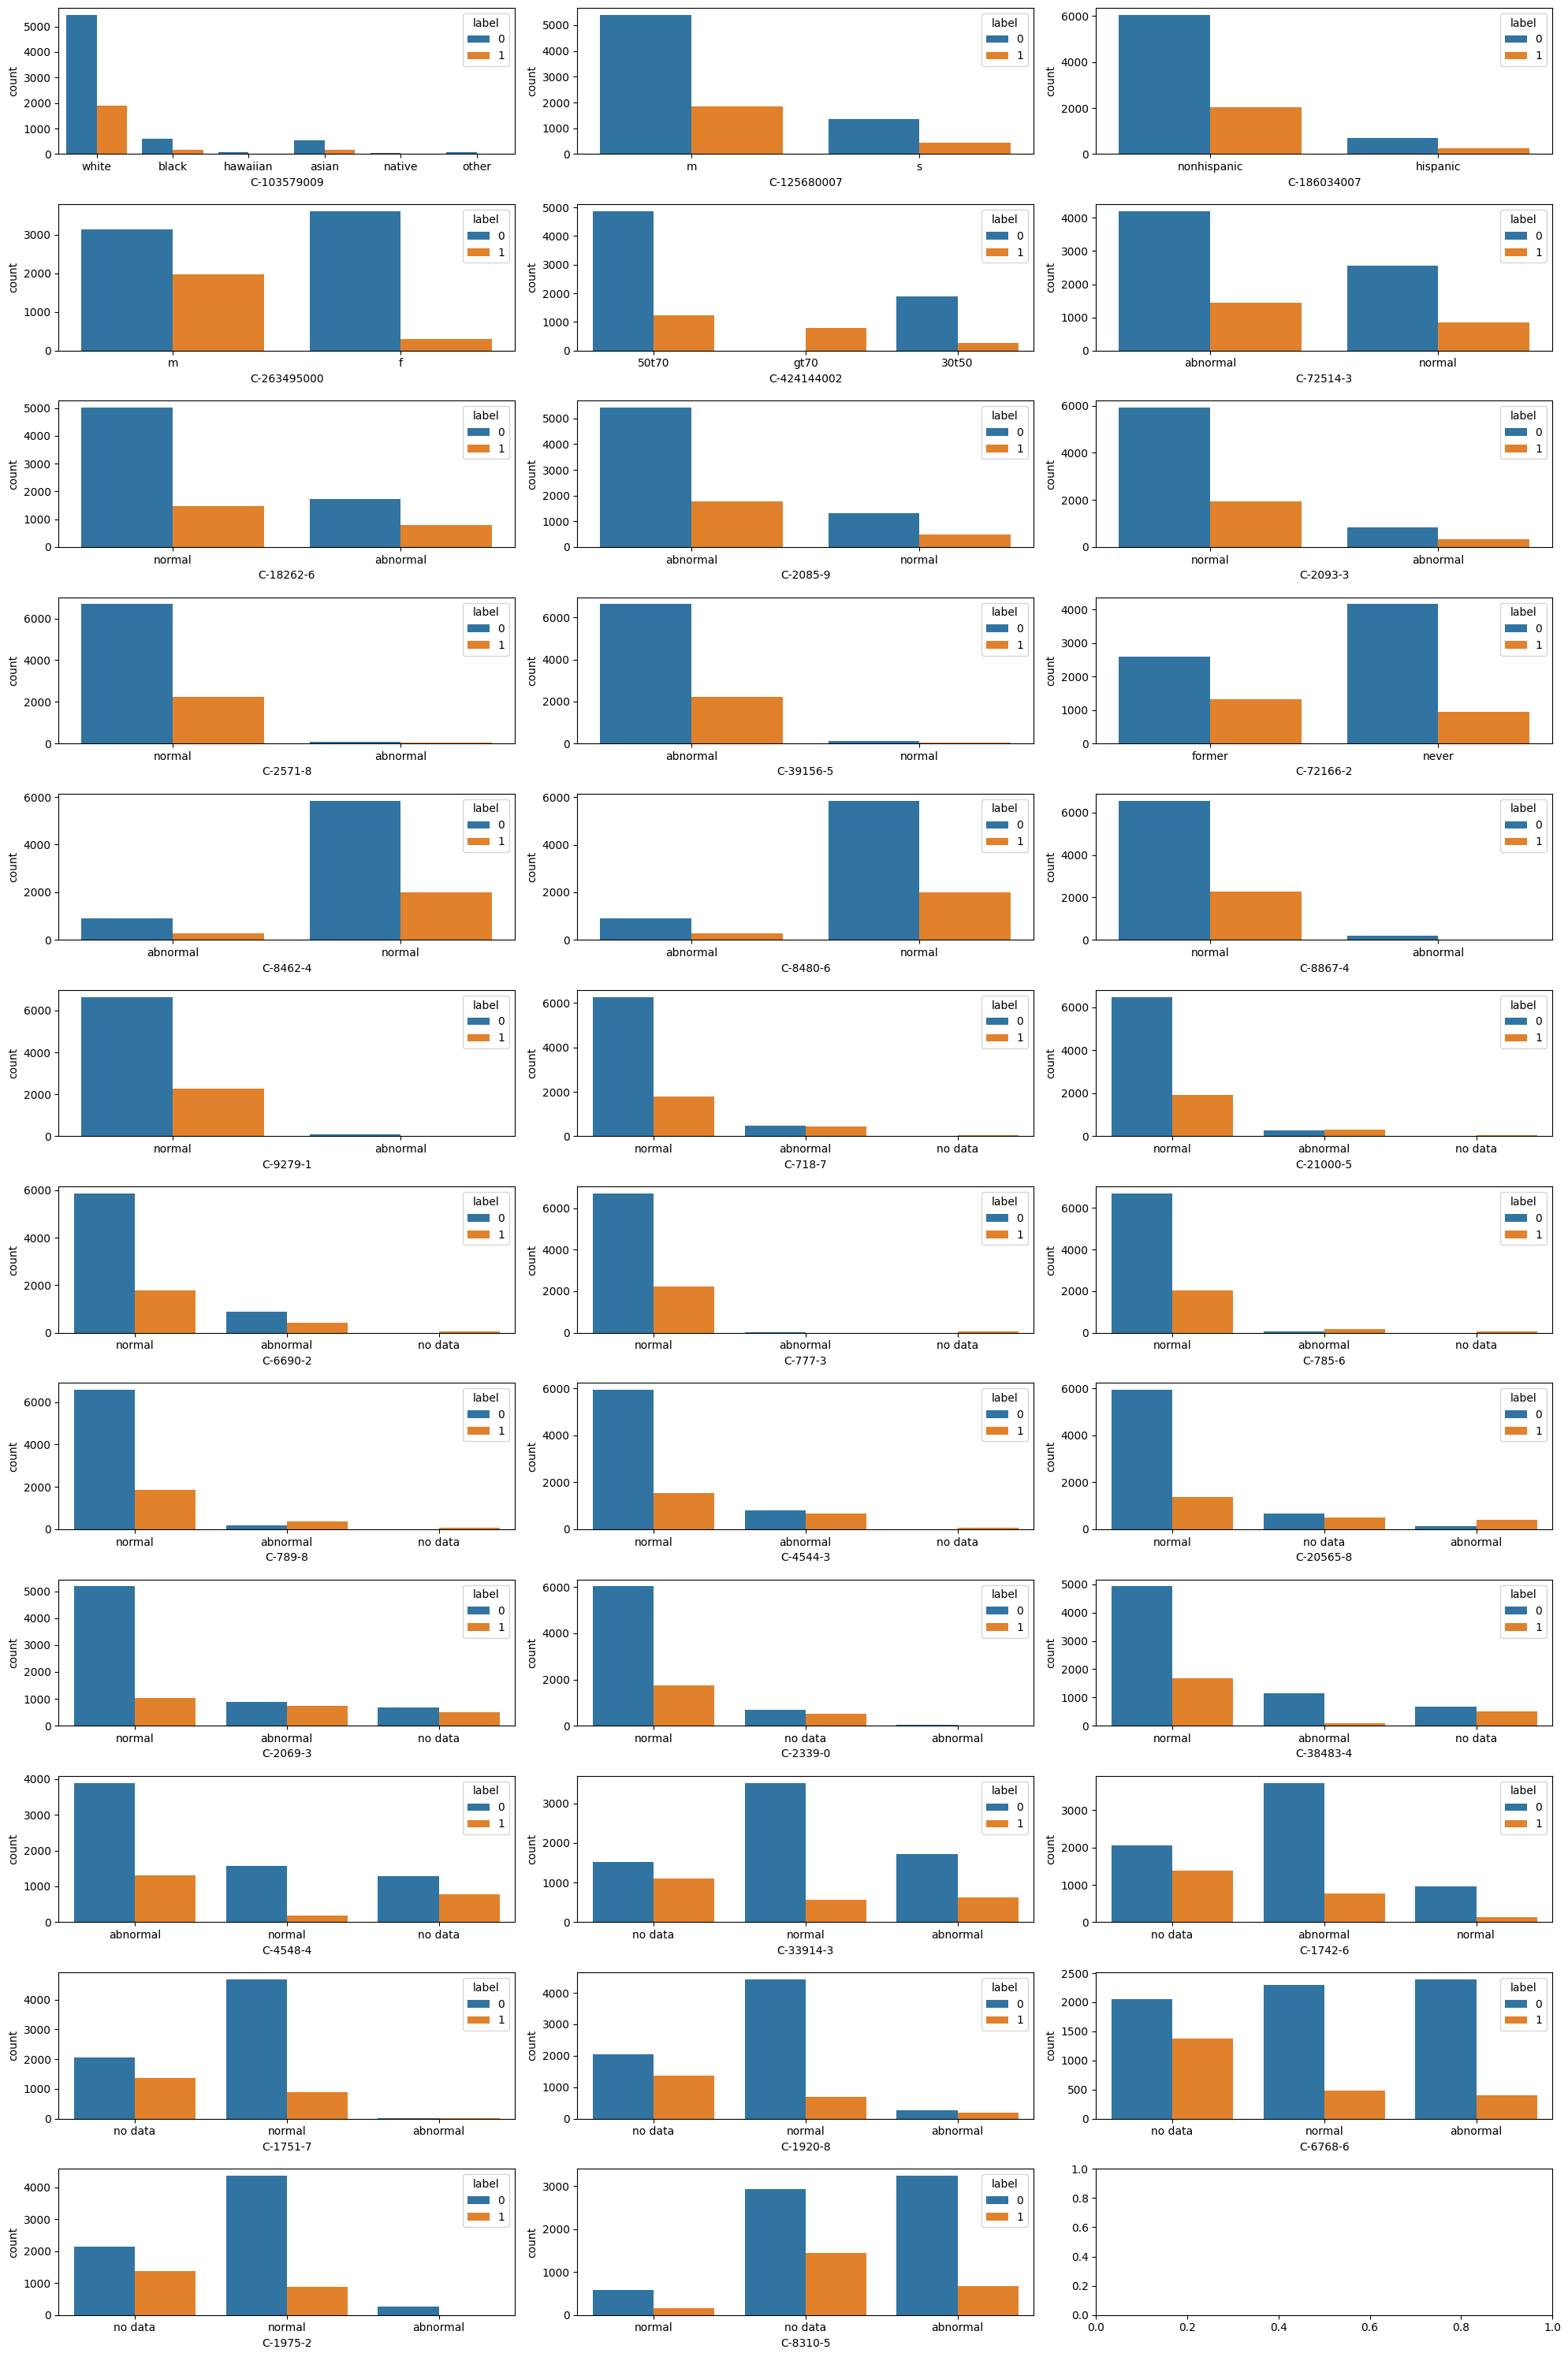

In [82]:
plots_per_row = 3

plot_count = 0
cat_col = [col for col in df.columns if df[col].dtype == 'object']

fig, axes = plt.subplots(len(cat_col) // plots_per_row + 1, plots_per_row, figsize=(20, 30))

for col in cat_col:
    sns.countplot(x=col, hue='label', data=df, ax=axes[plot_count // plots_per_row, plot_count % plots_per_row])
    
    plot_count += 1

for i in range(plot_count, len(cat_col) // plots_per_row * plots_per_row):
    axes[plot_count // plots_per_row, plot_count % plots_per_row].axis('off')

plt.tight_layout()

plt.show()

In [ ]:
# TODO
# mozliwy grouping
# poczyścić kolumny jeszcze
# encoding
# scaling scc
# modele
# ewentualnie korelacje, ale to nie wiem czy warto